In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
# set display's options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [4]:
#1
df = pd.read_csv('survey_results_public.csv')

In [5]:
# drop NA value
df.dropna(inplace=True)

In [6]:
# choosen columns (3x numerical, 1x yes/no and 1x category)
df1 = pd.read_csv('survey_results_public.csv',
                  usecols=['Respondent', 'YearsCodePro', 'WorkWeekHrs',
                           'Age', 'Hobbyist', 'OpSys'],
                  index_col='Respondent')

In [7]:
#2
# replace value (we need float or int (no objects))
df1.replace(to_replace='Less than 1 year', value='0', inplace=True)
df1.replace(to_replace='More than 50 years', value='51', inplace=True)
# change yes/no values to 1/0 values
df1.replace(to_replace='Yes', value='1', inplace=True)
df1.replace(to_replace='No', value='0', inplace=True)
df1.dropna(inplace=True)

In [8]:
df1['YearsCodePro'] = df1['YearsCodePro'].astype(float)

In [13]:
print(df1.dtypes)
# cor check
df1.corr()

Hobbyist         object
YearsCodePro    float64
WorkWeekHrs     float64
OpSys            object
Age             float64
dtype: object


,YearsCodePro,WorkWeekHrs,Age
YearsCodePro,1.000000,0.015847,0.827884
WorkWeekHrs,0.015847,1.000000,0.019748
Age,0.827884,0.019748,1.000000


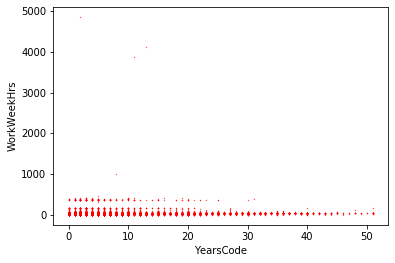

In [14]:
# plot check
plt.plot(df1['YearsCodePro'], df1['WorkWeekHrs'], 'ro', markersize=0.3)
plt.xlabel('YearsCode')
plt.ylabel('WorkWeekHrs')
plt.show()

In [15]:
#3
# one-hot encoding (get_dummies) and joint both data frames (df1 and one_hot)
one_hot = pd.get_dummies(df1["OpSys"])
one_hot.dropna(inplace=True)
df2 = df1.join(one_hot)

In [18]:
# check types of df
print(df2.dtypes)

Hobbyist         object
YearsCodePro    float64
WorkWeekHrs     float64
OpSys            object
Age             float64
BSD               uint8
Linux-based       uint8
MacOS             uint8
Windows           uint8
dtype: object


       YearsCodePro   WorkWeekHrs           Age
count  60063.000000  60063.000000  60063.000000
mean       8.043704     42.124276     31.490363
std        7.343599     38.116684      8.277101
min        0.000000      1.000000      1.000000
25%        3.000000     40.000000     26.000000
50%        6.000000     40.000000     30.000000
75%       11.000000     44.000000     35.000000
max       51.000000   4850.000000     99.000000


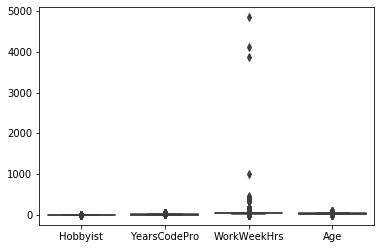

In [21]:
# df1 describe and boxplot before remove the outliers
print(df1.describe())
sns.boxplot(data=df1)
plt.show()

In [22]:
# remove outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
q = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
# descrabe frame after remove outliers
q.describe()

,YearsCodePro,WorkWeekHrs,Age,BSD,Linux-based,MacOS,Windows
count,47725.000000,47725.000000,47725.000000,47725.000000,47725.000000,47725.000000,47725.000000
mean,6.969199,41.109618,30.375156,0.000608,0.237528,0.308958,0.452907
std,5.446836,3.667782,6.170910,0.024643,0.425573,0.462068,0.497783
min,0.000000,34.000000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,40.000000,26.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,40.000000,29.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,42.000000,34.000000,0.000000,0.000000,1.000000,1.000000
max,23.000000,50.000000,48.000000,1.000000,1.000000,1.000000,1.000000


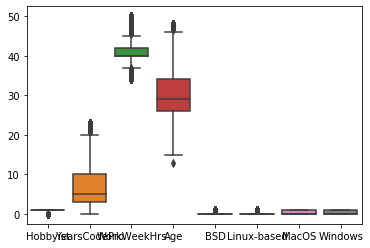

In [24]:
# df1 boxplot after remove the outliers
sns.boxplot(data=q)
plt.show()

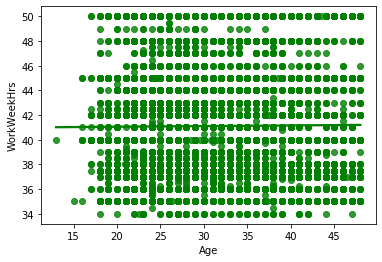

In [29]:
sns.regplot(y=q['WorkWeekHrs'], x=q['Age'], color="g")
plt.show()

In [32]:
#4
# linear regression model (x1)
reg = linear_model.LinearRegression()
reg.fit(q[['WorkWeekHrs']], q['Age'])
# prediction
print(reg.predict([[5]]))
print(reg.coef_)
# mean_squared_error (x1)
y_true1 = [5, 10, 15, 20]
y_pred1 = [reg.predict([[5]]), reg.predict([[10]]),
           reg.predict([[16]]), reg.predict([[20]])]
print(mean_squared_error(y_true1, y_pred1))

[29.83013502]
[0.0150935]
334.69687124973984


In [33]:
# linear regression model (x1 and x2)
reg.fit(q[['WorkWeekHrs', 'YearsCodePro']], q['Age'])
# prediction
print(reg.predict([[8, 4]]))
print(reg.coef_)
# mean_squared_error (x1 and x2)
y_true2 = [8, 10, 7, 20]
y_pred2 = [reg.predict([[4, 8]]), reg.predict([[6, 10]]),
           reg.predict([[7, 15]]), reg.predict([[22, 20]])]
print(mean_squared_error(y_true2, y_pred2))

[27.98191634]
[-0.00584034  0.87114772]
625.6084375470451


In [34]:
# linear regression model (x1 and x2)
reg.fit(q[['WorkWeekHrs', 'YearsCodePro', 'Hobbyist', 'Windows']], q['Age'])
# prediction
print(reg.predict([[2, 6, 1, 0]]))
print(reg.coef_)
# mean_squared_error (x1, x2 and ())
y_true3 = [8, 10, 7, 20]
y_pred3 = [reg.predict([[4, 8, 1, 0]]), reg.predict([[6, 10, 0, 1]]),
           reg.predict([[7, 15, 1, 0]]), reg.predict([[22, 20, 1, 0]])]
print(mean_squared_error(y_true3, y_pred3))

[29.57588634]
[-0.00497759  0.8710147  -0.47162208  0.11029987]
623.6075566673463
